In [ ]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Loading MNIST Dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',as_frame=False)
X_train,y_train = mnist.data[:60_000],mnist.target[:60_000]
X_test,y_test = mnist.data[60_000:],mnist.target[60_000:]

In [ ]:
# import PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_[:10]

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001])

As we can see in first principal component we have 0.097 varaince

In [ ]:
# want make first component have variance 0.95
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95) + 1

In [ ]:
d

np.int64(154)

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [ ]:
pca.n_components_

np.int64(154)

In [ ]:
X_reduced.shape

(60000, 154)

In [ ]:
# Randomized PCA to search d dimesnion
rnd_pca = PCA(n_components=154,svd_solver='randomized',random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

In [ ]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train,n_batches):
  inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

In [ ]:
# Random projection
from sklearn.random_projection import johnson_lindenstrauss_min_dim
m, e = 5_000,0.1
d = johnson_lindenstrauss_min_dim(m,eps=e)
d

np.int64(7300)

In [ ]:
# see how many features will have in 1000 dataset
x = X_train[:1000]

In [ ]:
pca = PCA(n_components=0.95)
x_small = pca.fit_transform(x)

In [ ]:
pca.n_components_

np.int64(129)

In [ ]:
# Training the dataset on random forest
from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier()
random_clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

The accuracy_score is 0.9698


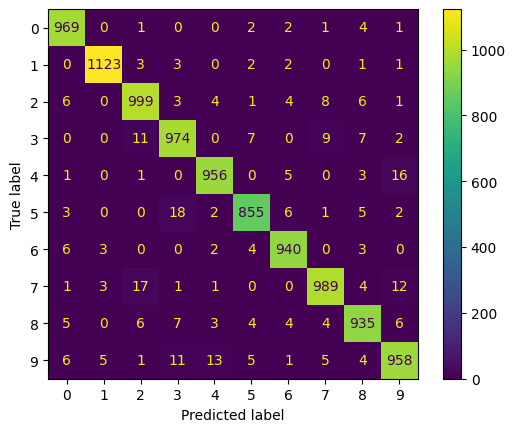

In [ ]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
y_pred = random_clf.predict(X_test)
print(f'The accuracy_score is {accuracy_score(y_test,y_pred)}')
ConfusionMatrixDisplay.from_estimator(random_clf,X_test,y_test)

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [ ]:
random_clf = RandomForestClassifier()
random_clf.fit(X_reduced,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

The accuracy_score is 0.9503


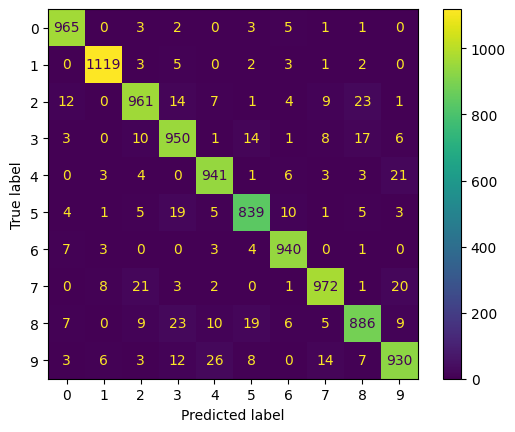

In [ ]:
y_pred = random_clf.predict(pca.transform(X_test))
print(f'The accuracy_score is {accuracy_score(y_test,y_pred)}')
ConfusionMatrixDisplay.from_estimator(random_clf,pca.transform(X_test),y_test)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_reduced,y_train)

SGDClassifier()

The accuracy_score is 0.8987


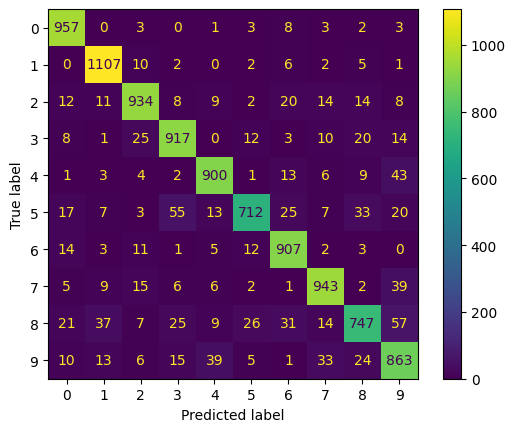

In [ ]:
y_pred = sgd_clf.predict(pca.transform(X_test))
print(f'The accuracy_score is {accuracy_score(y_test,y_pred)}')
ConfusionMatrixDisplay.from_estimator(sgd_clf,pca.transform(X_test),y_test)

In [ ]:
# importing t-sne to reduce data to 2 dimensions
from sklearn.manifold import TSNE
tsne = TSNE()
x = X_train[:5000]
x_reduced = tsne.fit_transform(x)
y_reduced = y_train[:5000]

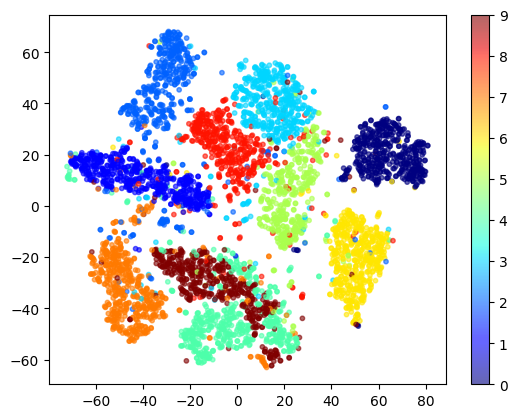

In [ ]:
plt.scatter(x_reduced[:,0],x_reduced[:,1],c = y_reduced.astype(np.int8),cmap='jet',alpha=0.6,s=10)
plt.colorbar()
plt.show()

In [24]:
pca = PCA(n_components = 0.95)
x_reduced = pca.fit_transform(x)

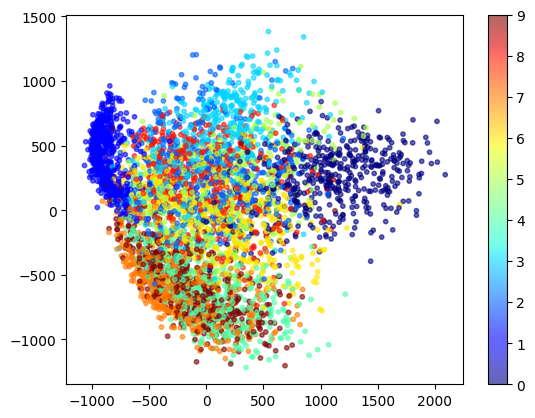

In [27]:
plt.scatter(x_reduced[:,0],x_reduced[:,1],c=y_reduced.astype(np.int8),cmap='jet',alpha=0.6,s=10)
plt.colorbar()
plt.show()